In [1]:
from coffea.util import load
import numpy as np

from hist import Hist
import matplotlib.pyplot as plt

In [2]:
from pocket_coffea.parameters import defaults
plotting_style = defaults.get_default_parameters().plotting_style

In [3]:
plotting_style

{'collapse_datasets': True, 'fontsize': 22, 'fontsize_legend_ratio': 12, 'opts_figure': {'datamc': {'figsize': [12, 9]}, 'datamc_ratio': {'figsize': [12, 12], 'gridspec_kw': {'height_ratios': [3, 1]}, 'sharex': True}, 'partial': {'figsize': [12, 15], 'gridspec_kw': {'height_ratios': [3, 1]}, 'sharex': True}}, 'opts_data': {'color': 'black', 'elinewidth': 1, 'label': 'Data', 'linestyle': 'solid', 'linewidth': 0, 'marker': '.', 'markersize': 5.0}, 'opts_mc': {'histtype': 'fill', 'stack': True, 'flow': 'sum', 'edges': False}, 'opts_syst': {'down': {'color': 'blue', 'linestyle': 'dotted', 'linewidth': 1}, 'nominal': {'color': 'black', 'linestyle': 'solid', 'linewidth': 1}, 'up': {'color': 'red', 'linestyle': 'dashed', 'linewidth': 1}}, 'opts_unc': {'Down': {'elinewidth': 1, 'linestyle': 'dotted', 'linewidth': 1, 'marker': '.', 'markersize': 1.0}, 'Up': {'elinewidth': 1, 'linestyle': 'dashed', 'linewidth': 1, 'marker': '.', 'markersize': 1.0}, 'total': {'color': [0.0, 0.0, 0.0, 0.4], 'facec

In [4]:
df = load("/work/dvalsecc/ttHbb/AnalysisConfigs/configs/zmumu/test_dask/output_all.coffea")

In [5]:
df["cutflow"]

{'initial': {'DATA_SingleMuon_2018_EraA': 241608232,
  'DYJetsToLL_M-50_2018': 195510810,
  'DATA_SingleMuon_2018_EraD': 513909894,
  'DATA_SingleMuon_2018_EraC': 109986009,
  'DATA_SingleMuon_2018_EraB': 119918017},
 'skim': {'DATA_SingleMuon_2018_EraA': 182721650,
  'DYJetsToLL_M-50_2018': 42180665,
  'DATA_SingleMuon_2018_EraD': 416492318,
  'DATA_SingleMuon_2018_EraC': 89702938,
  'DATA_SingleMuon_2018_EraB': 91326404},
 'presel': {'DATA_SingleMuon_2018_EraA': 10474575,
  'DYJetsToLL_M-50_2018': 24267626,
  'DATA_SingleMuon_2018_EraD': 24042954,
  'DATA_SingleMuon_2018_EraC': 5193039,
  'DATA_SingleMuon_2018_EraB': 5305372},
 'baseline': {'DATA_SingleMuon_2018_EraA': {'DATA_SingleMuon': 10474575},
  'DYJetsToLL_M-50_2018': {'DYJetsToLL': 24267626},
  'DATA_SingleMuon_2018_EraD': {'DATA_SingleMuon': 24042954},
  'DATA_SingleMuon_2018_EraC': {'DATA_SingleMuon': 5193039},
  'DATA_SingleMuon_2018_EraB': {'DATA_SingleMuon': 5305372}}}

In [6]:
df["sumw"]

{'baseline': {'DYJetsToLL_M-50_2018': {'DYJetsToLL': 44614145.49454534}}}

In [7]:
df["sum_genweights"]

{'DYJetsToLL_M-50_2018': 3323477400000.0}

In [8]:
df["variables"].keys()

dict_keys(['MuonGood_eta_1', 'MuonGood_pt_1', 'MuonGood_phi_1', 'nElectronGood', 'nMuonGood', 'nJets', 'nBJets', 'JetGood_eta_1', 'JetGood_pt_1', 'JetGood_phi_1', 'JetGood_btagDeepFlavB_1', 'JetGood_eta_2', 'JetGood_pt_2', 'JetGood_phi_2', 'JetGood_btagDeepFlavB_2', 'mll'])

In [9]:
df["variables"]["mll"]

defaultdict(dict,
            {'DATA_SingleMuon': {'DATA_SingleMuon_2018_EraA': Hist(
                StrCategory(['baseline'], name='cat', label='Category'),
                Regular(100, 0, 200, name='ll.mass', label='$M_{\\ell\\ell}$ [GeV]'),
                storage=Weight()) # Sum: WeightedSum(value=1.04425e+07, variance=1.04425e+07) (WeightedSum(value=1.04746e+07, variance=1.04746e+07) with flow),
              'DATA_SingleMuon_2018_EraD': Hist(
                StrCategory(['baseline'], name='cat', label='Category'),
                Regular(100, 0, 200, name='ll.mass', label='$M_{\\ell\\ell}$ [GeV]'),
                storage=Weight()) # Sum: WeightedSum(value=2.39693e+07, variance=2.39693e+07) (WeightedSum(value=2.4043e+07, variance=2.4043e+07) with flow),
              'DATA_SingleMuon_2018_EraC': Hist(
                StrCategory(['baseline'], name='cat', label='Category'),
                Regular(100, 0, 200, name='ll.mass', label='$M_{\\ell\\ell}$ [GeV]'),
                stora

In [10]:
from pocket_coffea.parameters import defaults
from pocket_coffea.utils import plot_utils


In [11]:
from importlib import reload

In [12]:
reload(plot_utils)
PlotManager = plot_utils.PlotManager

In [13]:
plotter = PlotManager(
        variables=df["variables"].keys(),
        hist_objs=df['variables'],
        datasets_metadata=df["datasets_metadata"],
        plot_dir="test_plots",
        style_cfg=plotting_style,
        only_cat=[],
        log=False,
        density=False,
        save=True,
        workers = 5
    )

In [14]:
plotter.shape_objects

{'MuonGood_eta_1_2018': <pocket_coffea.utils.plot_utils.Shape at 0x7f60620f5fa0>,
 'MuonGood_pt_1_2018': <pocket_coffea.utils.plot_utils.Shape at 0x7f60620f5fd0>,
 'MuonGood_phi_1_2018': <pocket_coffea.utils.plot_utils.Shape at 0x7f6056042fa0>,
 'nElectronGood_2018': <pocket_coffea.utils.plot_utils.Shape at 0x7f6062306d90>,
 'nMuonGood_2018': <pocket_coffea.utils.plot_utils.Shape at 0x7f6062306e80>,
 'nJets_2018': <pocket_coffea.utils.plot_utils.Shape at 0x7f61372673d0>,
 'nBJets_2018': <pocket_coffea.utils.plot_utils.Shape at 0x7f6062306f10>,
 'JetGood_eta_1_2018': <pocket_coffea.utils.plot_utils.Shape at 0x7f6061f907c0>,
 'JetGood_pt_1_2018': <pocket_coffea.utils.plot_utils.Shape at 0x7f6056063af0>,
 'JetGood_phi_1_2018': <pocket_coffea.utils.plot_utils.Shape at 0x7f61341f5fd0>,
 'JetGood_btagDeepFlavB_1_2018': <pocket_coffea.utils.plot_utils.Shape at 0x7f6061a0e760>,
 'JetGood_eta_2_2018': <pocket_coffea.utils.plot_utils.Shape at 0x7f6061a0e730>,
 'JetGood_pt_2_2018': <pocket_coffea

In [15]:
shape =  plotter.shape_objects["JetGood_pt_2_2018"]

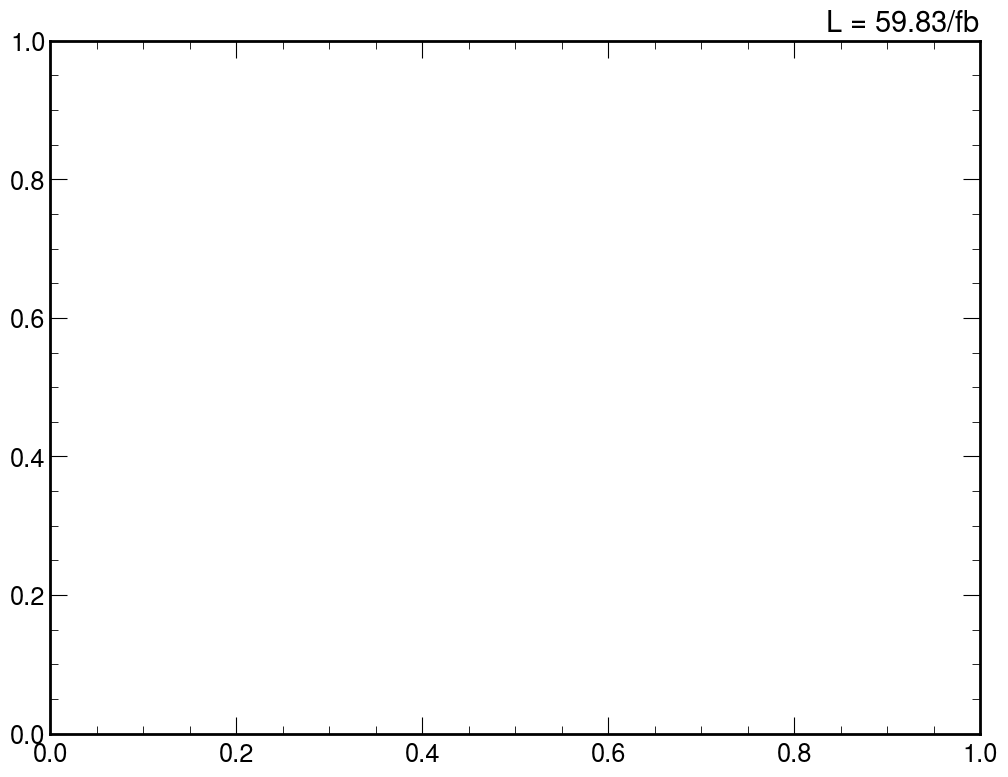

In [16]:
shape.define_figure(False)


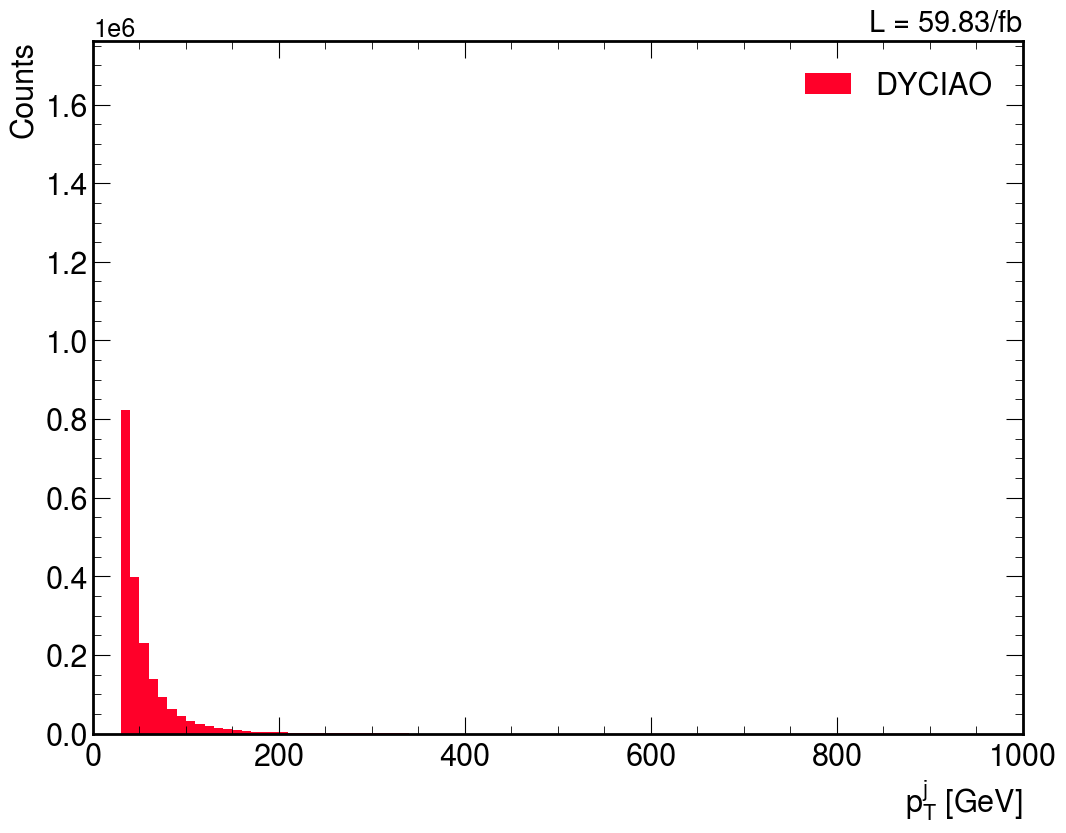

In [17]:
shape.build_stacks("baseline", False)
#shape.plot_data()
shape.plot_mc()
#shape.ax.set_yscale("log")
shape.fig


In [18]:
shape.h_dict_mc


{'DYJetsToLL': Hist(
   StrCategory(['nominal', 'pileupDown', 'pileupUp', 'sf_mu_idDown', 'sf_mu_idUp', 'sf_mu_isoDown', 'sf_mu_isoUp'], name='variation', label='Variation'),
   Regular(100, 0, 1000, name='JetGood.pt', label='$p_{T}^{j}$ [GeV]'),
   storage=Weight()) # Sum: WeightedSum(value=1.36142e+07, variance=9.86376e+07) (WeightedSum(value=1.36144e+07, variance=9.86385e+07) with flow)}

[       nan        nan        nan 1.07182854 1.11597397 1.16291135
 1.19579565 1.21061799 1.22818781 1.23728027 1.18596718 1.23345005
 1.16258752 1.15895015 1.20539966 1.15903174 1.194114   1.19134018
 1.12900844 1.14364627 1.16312921 1.06483447 1.07685247 1.07762124
 1.06638809 1.12523394 1.06561902 0.98375635 1.22872633 1.05370106
 0.89037055 0.99905192 0.93692966 0.76206374 0.95331692 0.91526105
 1.16143091 1.08516682 0.83127183 0.9760821  1.20508014 0.87293416
 0.93395058 1.14802262 0.94484434 1.38338047 1.24383152 1.01544171
 0.75294862 1.25120138 0.58409669 0.71773736 0.93214928 0.91030394
 1.35034311 0.89070628 0.65263202 0.88012116 0.9857645  0.88100398
 1.2127078  0.93216945 0.41880137 1.89166418 1.04953429 0.67396709
 0.86050487 0.51072019 1.30173388 0.80742078 0.54271376 1.62797997
 1.20382522 0.76140353 0.48455859 0.90455751 2.16274527        inf
 0.68412837 0.44055111 0.58304847 0.56775927 1.20461759 0.18509121
 3.1366786  1.9985135  0.         0.56096888        inf 1.6799

/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:413: RuntimeWarning: divide by zero encountered in divide
  self.ratio = num / den
/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:413: RuntimeWarning: invalid value encountered in divide
  self.ratio = num / den
/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:416: RuntimeWarning: divide by zero encountered in divide
  self.ratio_unc = np.sqrt(num) / den
/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:416: RuntimeWarning: invalid value encountered in divide
  self.ratio_unc = np.sqrt(num) / den
/t3home/dvalsecc/micromamba/envs/pocket-coffea/lib/python3.9/site-packages/matplotlib/axes/_axes.py:3648: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err
/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/utils/plot_utils.py:727: RuntimeWarning: divide by zero encountered in divide
  return np.where(self.

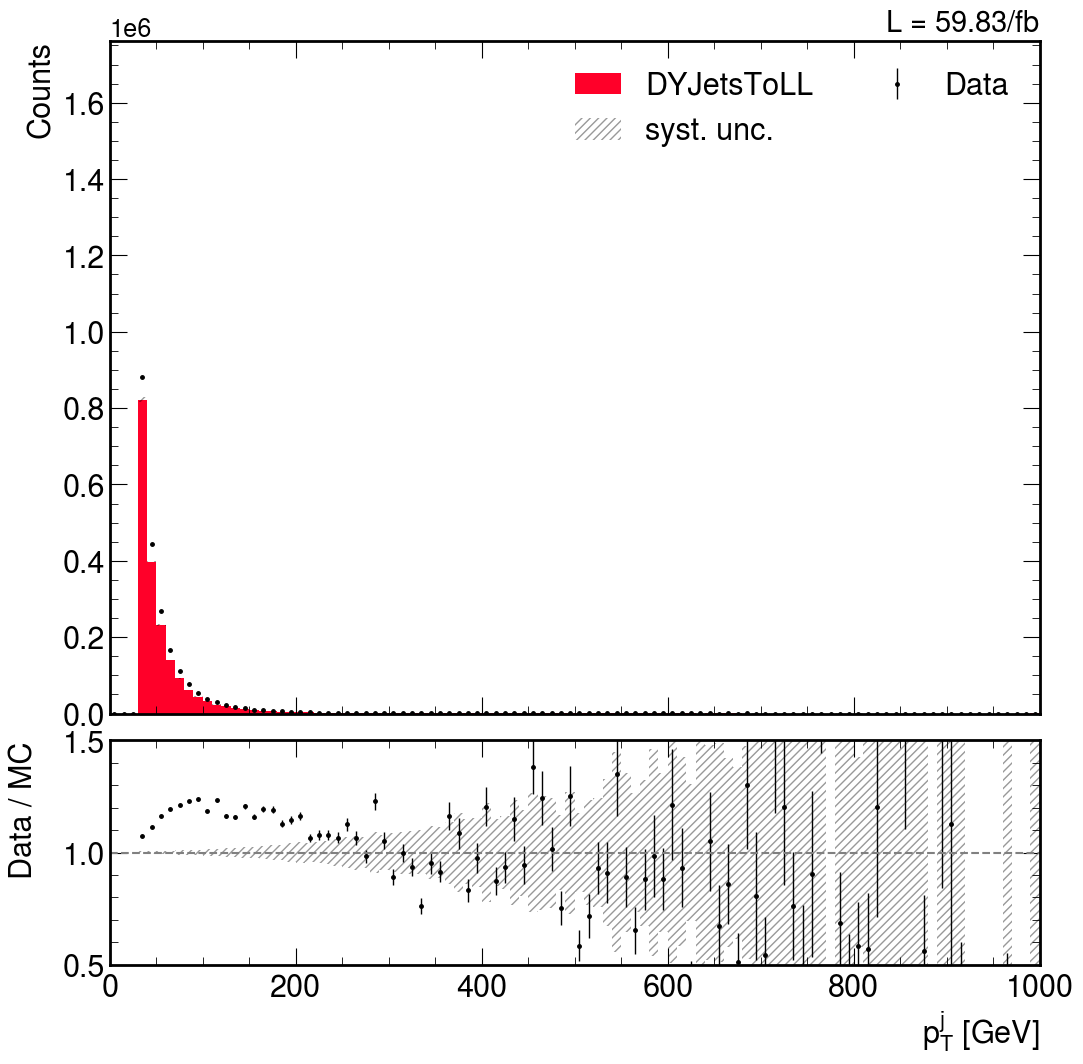

In [20]:
shape.define_figure(True)
shape.get_systematic_uncertainty()
shape.plot_datamc(True,True)

In [22]:
plotter.plot_datamc_all()

Plotting:  MuonGood_eta_1_2018
Plotting:  MuonGood_pt_1_2018
Plotting:  MuonGood_phi_1_2018
[       nan 0.98842703 1.0045587  0.9939053  1.00087527 0.99284017
 0.99720703 0.97719505 1.00397955 1.01671748 1.0213077  1.0142975
 1.01013297 1.00269152 1.01145524 1.01367236 1.00373872 1.01586699
 1.02148936 1.01880853 1.02231548 1.01796692 0.9917912  1.01331833
 1.01997954 1.02113103 1.01388829 0.98869969 1.01389197 1.01538525
 1.01483781 1.01862509 1.01204066 0.99870392 1.00868923 1.00874136
 1.00060239 1.00494427 1.01240801 1.01593559 1.01884341 1.01128332
 0.98977409 1.01067532 1.00264659 1.00534087 1.00219083 1.01330052
 0.99391844        nan] [       inf 0.00134921 0.0013052  0.00128382 0.00122555 0.00117893
 0.00115552 0.001126   0.00110135 0.00108627 0.00107158 0.00104699
 0.00102927 0.00101648 0.00100119 0.00099518 0.00099012 0.00096261
 0.0009516  0.00094065 0.00093336 0.00092871 0.00096107 0.00092342
 0.00091791 0.00091959 0.0009249  0.00096407 0.00092987 0.00092844
 0.00093829 0.

In [ ]:
style_cfg

In [ ]:
style_cfg

In [111]:
import pyaml


In [120]:
file = open("/work/dvalsecc/ttHbb/PocketCoffea/pocket_coffea/parameters/plotting_style.yaml", "w")

In [121]:
pyaml.dump(style_cfg, file)

In [122]:
file.close()